<a href="https://colab.research.google.com/github/DhruboDevPramanik/Deep-Learning/blob/main/2dropout%26regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataload

In [ ]:
import numpy as np
X_train = np.linspace(-1, 1, 20)

In [ ]:
X_train

array([-1.        , -0.89473684, -0.78947368, -0.68421053, -0.57894737,
       -0.47368421, -0.36842105, -0.26315789, -0.15789474, -0.05263158,
        0.05263158,  0.15789474,  0.26315789,  0.36842105,  0.47368421,
        0.57894737,  0.68421053,  0.78947368,  0.89473684,  1.        ])

In [ ]:
y_train = np.array([-0.6561 , -0.3099 , -0.59035, -0.50855, -0.285  ,
                    -0.2443 , -0.02445,  0.00135, -0.2006 ,  0.07475,
                    -0.1422 ,  0.06515,  0.15265,  0.3521 ,  0.28415,
                    0.5524 ,  0.23115,  0.20835, 0.4211,  0.60485])

In [ ]:
X_test = np.linspace(-1, 1, 20)

In [ ]:
y_test = np.array([-0.69415, -0.451  , -0.43005, -0.4484 , -0.1475 ,
                   -0.5019 , -0.28055,  0.24595, -0.21425, -0.0286 ,
                   0.23415,  0.46575, 0.07955,  0.1973 ,  0.0719 ,
                   0.3639 ,  0.5536 ,  0.3365 , 0.50705,  0.33435])

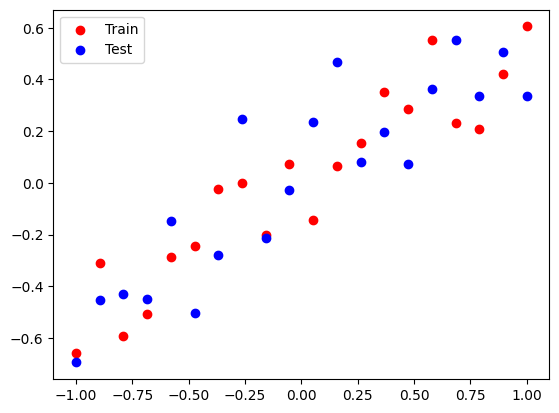

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X_train,y_train,c='red',label='Train')
plt.scatter(X_test,y_test,c='blue',label='Test')
plt.legend()
plt.show()

# Regression Model

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [ ]:
model=Sequential()
model.add(Dense(10,activation='relu',input_dim=1))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='linear'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(loss='mse',optimizer='Adam',metrics=['mse'])
history=model.fit(X_train,y_train,epochs=500,validation_data=(X_test,y_test),verbose=1)

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.1311 - mse: 0.1311 - val_loss: 0.1425 - val_mse: 0.1425
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step - loss: 0.1289 - mse: 0.1289 - val_loss: 0.1404 - val_mse: 0.1404
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - loss: 0.1268 - mse: 0.1268 - val_loss: 0.1383 - val_mse: 0.1383
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step - loss: 0.1248 - mse: 0.1248 - val_loss: 0.1362 - val_mse: 0.1362
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step - loss: 0.1228 - mse: 0.1228 - val_loss: 0.1342 - val_mse: 0.1342
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - loss: 0.1208 - mse: 0.1208 - val_loss: 0.1322 - val_mse: 0.1322
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step - loss: 0.1189 - mse: 0.1189 - val_loss: 0.1304 - val_mse: 0.1304
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step - loss: 0.1171 - mse: 0.1171 - val_loss: 0.1286 - val_mse: 0.1286
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - loss: 0.1152 - 

In [ ]:
# evaluate the model
_, train_mse = model.evaluate(X_train, y_train, verbose=0)
_, test_mse = model.evaluate(X_test, y_test, verbose=0)
print('Train: {}, Test: {}'.format(train_mse, test_mse))

Train: 0.01358262449502945, Test: 0.03173772618174553


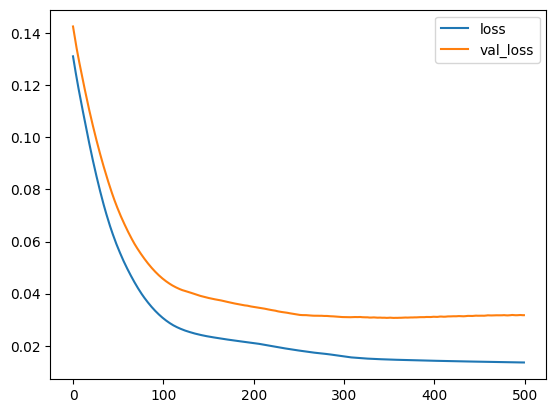

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.show()

In [ ]:
y_pred_1 = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


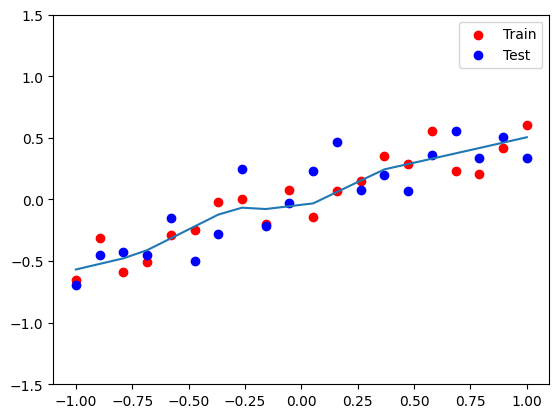

In [ ]:
plt.figure()
plt.scatter(X_train, y_train, c='red', label='Train')
plt.scatter(X_test, y_test, c='blue', label='Test')
plt.plot(X_test, y_pred_1)
plt.legend()
plt.ylim((-1.5, 1.5))
plt.show()

In [ ]:
model2=Sequential()
model2.add(Dense(10,activation='relu',input_dim=1))
model2.add(Dropout(.25))
model2.add(Dense(10,activation='relu'))
model2.add(Dropout(.25))
model2.add(Dense(1,activation='linear'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model2.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_30 (Dense)                │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 141 (564.00 B)

 Trainable params: 141 (564.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model2.compile(loss='mse',optimizer='Adam',metrics=['mse'])
history2=model2.fit(X_train,y_train,epochs=500,validation_data=(X_test,y_test),verbose=1)

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 909ms/step - loss: 0.2209 - mse: 0.2209 - val_loss: 0.2218 - val_mse: 0.2218
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step - loss: 0.2711 - mse: 0.2711 - val_loss: 0.2186 - val_mse: 0.2186
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.1929 - mse: 0.1929 - val_loss: 0.2155 - val_mse: 0.2155
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.2231 - mse: 0.2231 - val_loss: 0.2125 - val_mse: 0.2125
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.1734 - mse: 0.1734 - val_loss: 0.2095 - val_mse: 0.2095
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 0.2041 - mse: 0.2041 - val_loss: 0.2066 - val_mse: 0.2066
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.2157 - mse: 0.2157 - val_loss: 0.2036 - val_mse: 0.2036
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 0.1845 - mse: 0.1845 - val_loss: 0.2007 - val_mse: 0.2007
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.2215 - mse

In [ ]:
# evaluate the model
_, train_mse = model2.evaluate(X_train, y_train, verbose=0)
_, test_mse = model2.evaluate(X_test, y_test, verbose=0)
print('Train: {}, Test: {}'.format(train_mse, test_mse))

Train: 0.018887581303715706, Test: 0.03129984065890312


In [ ]:
y_pred_3 = model2.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


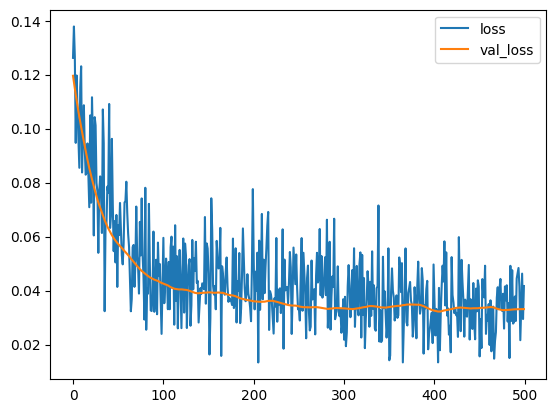

In [ ]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.show()

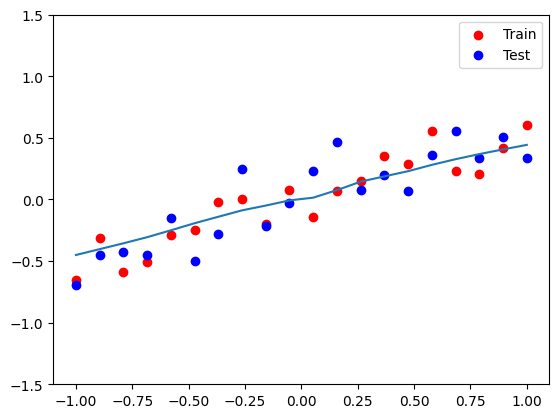

In [ ]:
plt.figure()
plt.scatter(X_train, y_train, c='red', label='Train')
plt.scatter(X_test, y_test, c='blue', label='Test')
plt.plot(X_test, y_pred_3)
plt.legend()
plt.ylim((-1.5, 1.5))
plt.show()

In [ ]:
model3=Sequential()
model3.add(Dense(10,activation='relu',input_dim=1))
model3.add(Dropout(.5))
model3.add(Dense(10,activation='relu'))
model3.add(Dropout(.5))
model3.add(Dense(1,activation='linear'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model3.compile(loss='mse',optimizer='Adam',metrics=['mse'])
history3=model3.fit(X_train,y_train,epochs=500,validation_data=(X_test,y_test),verbose=1)

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 904ms/step - loss: 0.0822 - mse: 0.0822 - val_loss: 0.1173 - val_mse: 0.1173
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step - loss: 0.1444 - mse: 0.1444 - val_loss: 0.1166 - val_mse: 0.1166
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.1351 - mse: 0.1351 - val_loss: 0.1163 - val_mse: 0.1163
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 0.1187 - mse: 0.1187 - val_loss: 0.1160 - val_mse: 0.1160
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.1448 - mse: 0.1448 - val_loss: 0.1155 - val_mse: 0.1155
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.1246 - mse: 0.1246 - val_loss: 0.1148 - val_mse: 0.1148
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.1672 - mse: 0.1672 - val_loss: 0.1141 - val_mse: 0.1141
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - loss: 0.1206 - mse: 0.1206 - val_loss: 0.1135 - val_mse: 0.1135
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.0960 - ms

In [ ]:
y_pred_4 = model3.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


In [ ]:
# evaluate the model
_, train_mse = model3.evaluate(X_train, y_train, verbose=0)
_, test_mse = model3.evaluate(X_test, y_test, verbose=0)
print('Train: {}, Test: {}'.format(train_mse, test_mse))

Train: 0.037260234355926514, Test: 0.04936473071575165


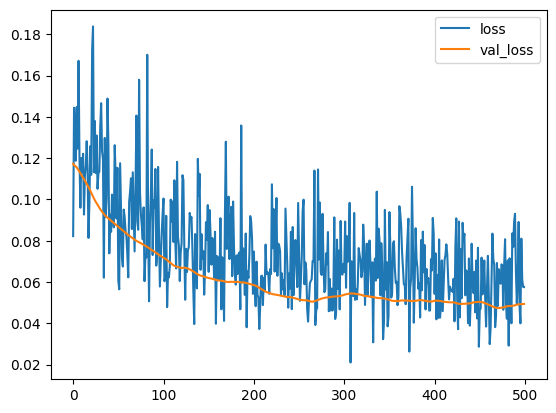

In [ ]:
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.show()

In [ ]:
plt.figure()
plt.scatter(X_train, y_train, c='red', label='Train')
plt.scatter(X_test, y_test, c='blue', label='Test')
plt.plot(X_test, y_pred_4)
plt.legend()
plt.ylim((-1.5, 1.5))
plt.show()

# Regularization

In [ ]:
model4=Sequential()
model4.add(Dense(10,activation='relu',input_dim=1,activity_regularizer=tf.keras.regularizers.l2(0.03)))
model4.add(Dense(10,activation='relu',activity_regularizer=tf.keras.regularizers.l2(0.03)))
model4.add(Dense(1,activation='linear'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model4.compile(loss='mse',optimizer='Adam',metrics=['mse'])
history=model4.fit(X_train,y_train,epochs=500,validation_data=(X_test,y_test),verbose=1)

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.3531 - mse: 0.1592 - val_loss: 0.3621 - val_mse: 0.1703
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 0.3471 - mse: 0.1554 - val_loss: 0.3564 - val_mse: 0.1667
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step - loss: 0.3415 - mse: 0.1518 - val_loss: 0.3509 - val_mse: 0.1632
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - loss: 0.3361 - mse: 0.1484 - val_loss: 0.3456 - val_mse: 0.1598
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - loss: 0.3308 - mse: 0.1451 - val_loss: 0.3404 - val_mse: 0.1567
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - loss: 0.3256 - mse: 0.1420 - val_loss: 0.3353 - val_mse: 0.1537
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: 0.3206 - mse: 0.1390 - val_loss: 0.3304 - val_mse: 0.1509
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 0.3157 - mse: 0.1362 - val_loss: 0.3255 - val_mse: 0.1482
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - loss: 0.3109 - mse:

In [ ]:
# evaluate the model
_, train_mse = model4.evaluate(X_train, y_train, verbose=0)
_, test_mse = model4.evaluate(X_test, y_test, verbose=0)
print('Train: {}, Test: {}'.format(train_mse, test_mse))

Train: 0.029532289132475853, Test: 0.04850092902779579


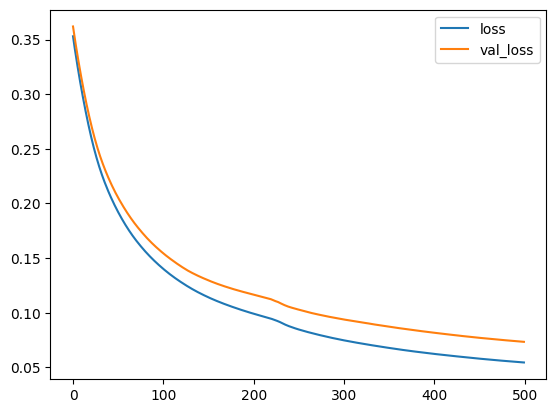

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.show()

In [ ]:
y_pred_5 = model4.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


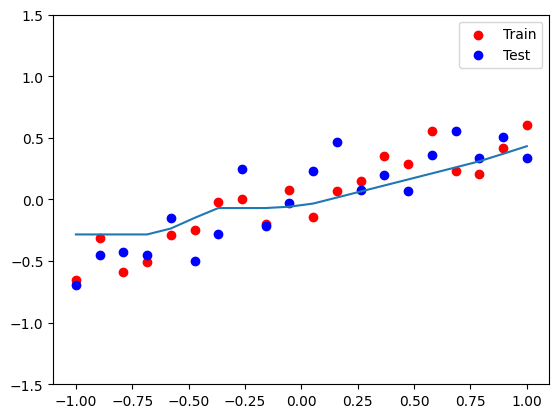

In [ ]:
plt.figure()
plt.scatter(X_train, y_train, c='red', label='Train')
plt.scatter(X_test, y_test, c='blue', label='Test')
plt.plot(X_test, y_pred_5)
plt.legend()
plt.ylim((-1.5, 1.5))
plt.show()